## Import the library

In [ ]:
# 구글 드라이브와 연결
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/My Drive/CUAI_BASIC/spaceship-titanic/train.csv')

In [ ]:
data=pd.read_csv('/content/drive/My Drive/CUAI_BASIC/spaceship-titanic/test.csv')

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
df.shape

(8693, 14)

In [ ]:
data.shape

(4277, 13)

### 결측치 존재 여부 확인 (시각화)

<Axes: >

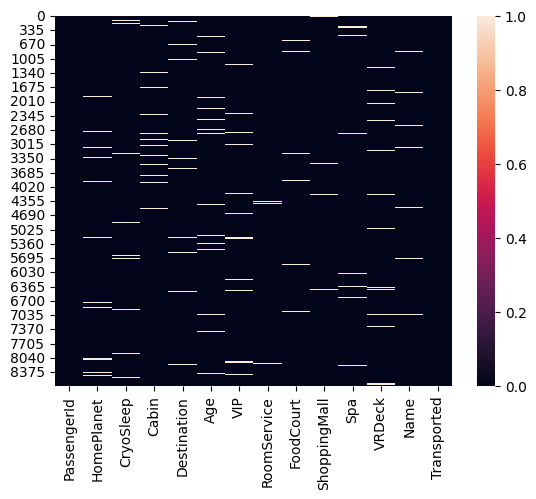

In [ ]:
sns.heatmap(df.isnull())

흰색으로 표시된 셀이 많을수록 결측치가 많다는 것을 나타냄

### 결측치 제거 및 대체

- '**PassengerId**' 열은 탑승자의 고유 식별 번호를 나타내는 열.  
이 열은 데이터 분석에 중요한 역할을 하지 않기 때문에 제거할 수 있습니다.

- '**Name**' 열은 탑승자의 이름을 나타내는 열.   
이름 자체가 생존 여부와 직접적인 연관성이 없으므로 분석에 필요하지 않을 수 있음. 또한 이름을 분석에 활용하려면 추가적인 전처리 작업이 필요할 수 있음.  
따라서 분석의 목적에 따라 Name 열을 제거할 수 있습니다.

In [ ]:
df.drop('PassengerId', axis=1)
df.drop('Name', axis=1, inplace=True)
data.drop('PassengerId', axis=1)
data.drop('Name', axis=1, inplace=True)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


**< 데이터프레임 df의 각 열에서 결측치를 채우기 >**

- **RoomService**: 결측치를 해당 열의 평균값으로 대체.
- **FoodCourt**: 결측치를 해당 열의 평균값으로 대체.
- **VRDeck**: 결측치를 해당 열의 평균값으로 대체.
- **CryoSleep**: 결측치를 해당 열의 최빈값(mode)으로 대체.
- **HomePlanet**: 결측치를 해당 열의 최빈값으로 대체.
- **Cabin**: 결측치를 해당 열의 최빈값으로 대체.
- **Destination**: 결측치를 해당 열의 최빈값으로 대체.
- **Age**: 결측치를 해당 열의 평균값으로 대체.
- **VIP**: 결측치를 해당 열의 최빈값으로 대체.
- **ShoppingMall**: 결측치를 해당 열의 평균값으로 대체.
- **Spa**: 결측치를 해당 열의 평균값으로 대체.

**수치형 변수**의 경우 **평균값**으로 대체하거나 **최빈값**으로 대체  
**범주형 변수**의 경우 **최빈값**으로 대체

In [ ]:
df['RoomService']=df['RoomService'].fillna(df['RoomService'].mean())
df['FoodCourt']=df['FoodCourt'].fillna(df['FoodCourt'].mean())
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].mean())
df['VRDeck']=df['VRDeck'].fillna(df['VRDeck'].mean())
df['CryoSleep']=df['CryoSleep'].fillna(df['CryoSleep'].mode()[0])
df['HomePlanet']=df['HomePlanet'].fillna(df['HomePlanet'].mode()[0])
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Destination']=df['Destination'].fillna(df['Destination'].mode()[0])
df['Age']=df['Age'].fillna(df['Age'].mean())
df['VIP']=df['VIP'].fillna(df['VIP'].mode()[0])
df['ShoppingMall']=df['ShoppingMall'].fillna(df['ShoppingMall'].mean())
df['Spa']=df['Spa'].fillna(df['Spa'].mean())

In [ ]:
data['RoomService']=data['RoomService'].fillna(data['RoomService'].mean())
data['FoodCourt']=data['FoodCourt'].fillna(data['FoodCourt'].mean())
data['VRDeck']=data['VRDeck'].fillna(data['VRDeck'].mean())
data['VRDeck']=data['VRDeck'].fillna(data['VRDeck'].mean())
data['CryoSleep']=data['CryoSleep'].fillna(data['CryoSleep'].mode()[0])
data['HomePlanet']=data['HomePlanet'].fillna(data['HomePlanet'].mode()[0])
data['Cabin']=data['Cabin'].fillna(data['Cabin'].mode()[0])
data['Destination']=data['Destination'].fillna(data['Destination'].mode()[0])
data['Age']=data['Age'].fillna(data['Age'].mean())
data['VIP']=data['VIP'].fillna(data['VIP'].mode()[0])
data['ShoppingMall']=data['ShoppingMall'].fillna(data['ShoppingMall'].mean())
data['Spa']=data['Spa'].fillna(data['Spa'].mean())

In [ ]:
df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [ ]:
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

데이터프레임 df와 data를 수직 방향으로 합치기

In [ ]:
new_df=pd.concat([df, data])

In [ ]:
new_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [ ]:
new_df.shape

(12970, 13)

데이터프레임 new_df의 각 변수(열)들 간의 상관관계를 시각화

<ipython-input-30-e75ec3b9669c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(), annot=True)


<Axes: >

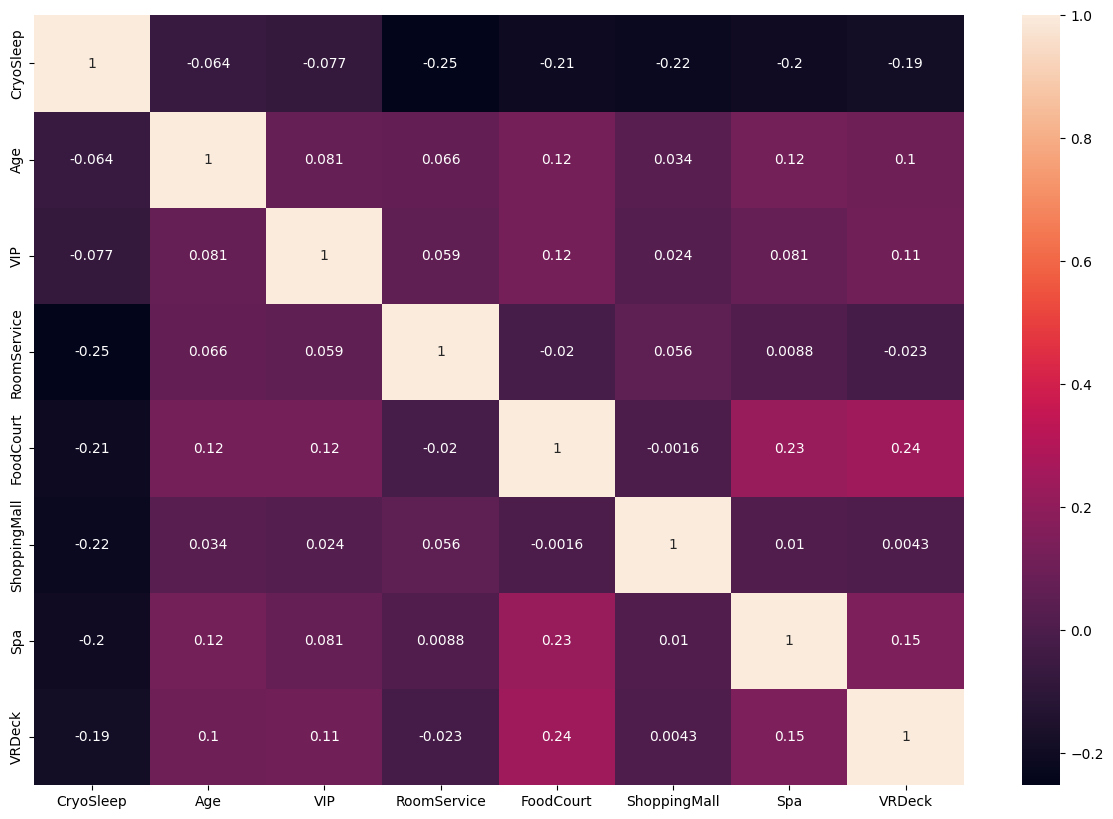

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(), annot=True)

상관관계는 -1에서 1 사이의 값을 가지며, 0은 두 변수가 전혀 상관관계가 없다는 것을 의미하며, 1에 가까울수록 양의 상관관계가 강하고, -1에 가까울수록 음의 상관관계가 강함

데이터프레임 new_df의 Age 변수(열)에 대한 히스토그램을 시각화

<Axes: xlabel='Age', ylabel='Count'>

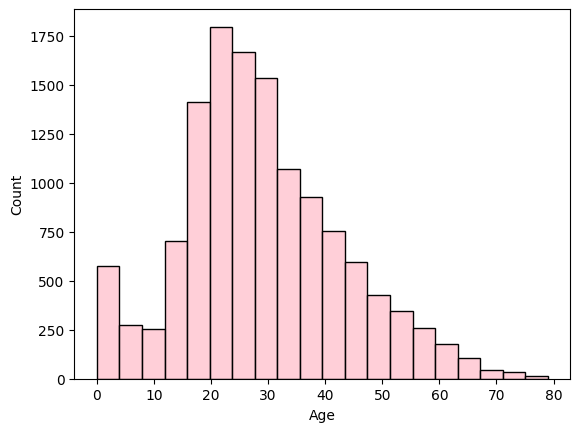

In [ ]:
sns.histplot(data=new_df, x='Age', bins=20, color='pink')

데이터프레임 new_df의 변수들 간의 산점도를 시각화

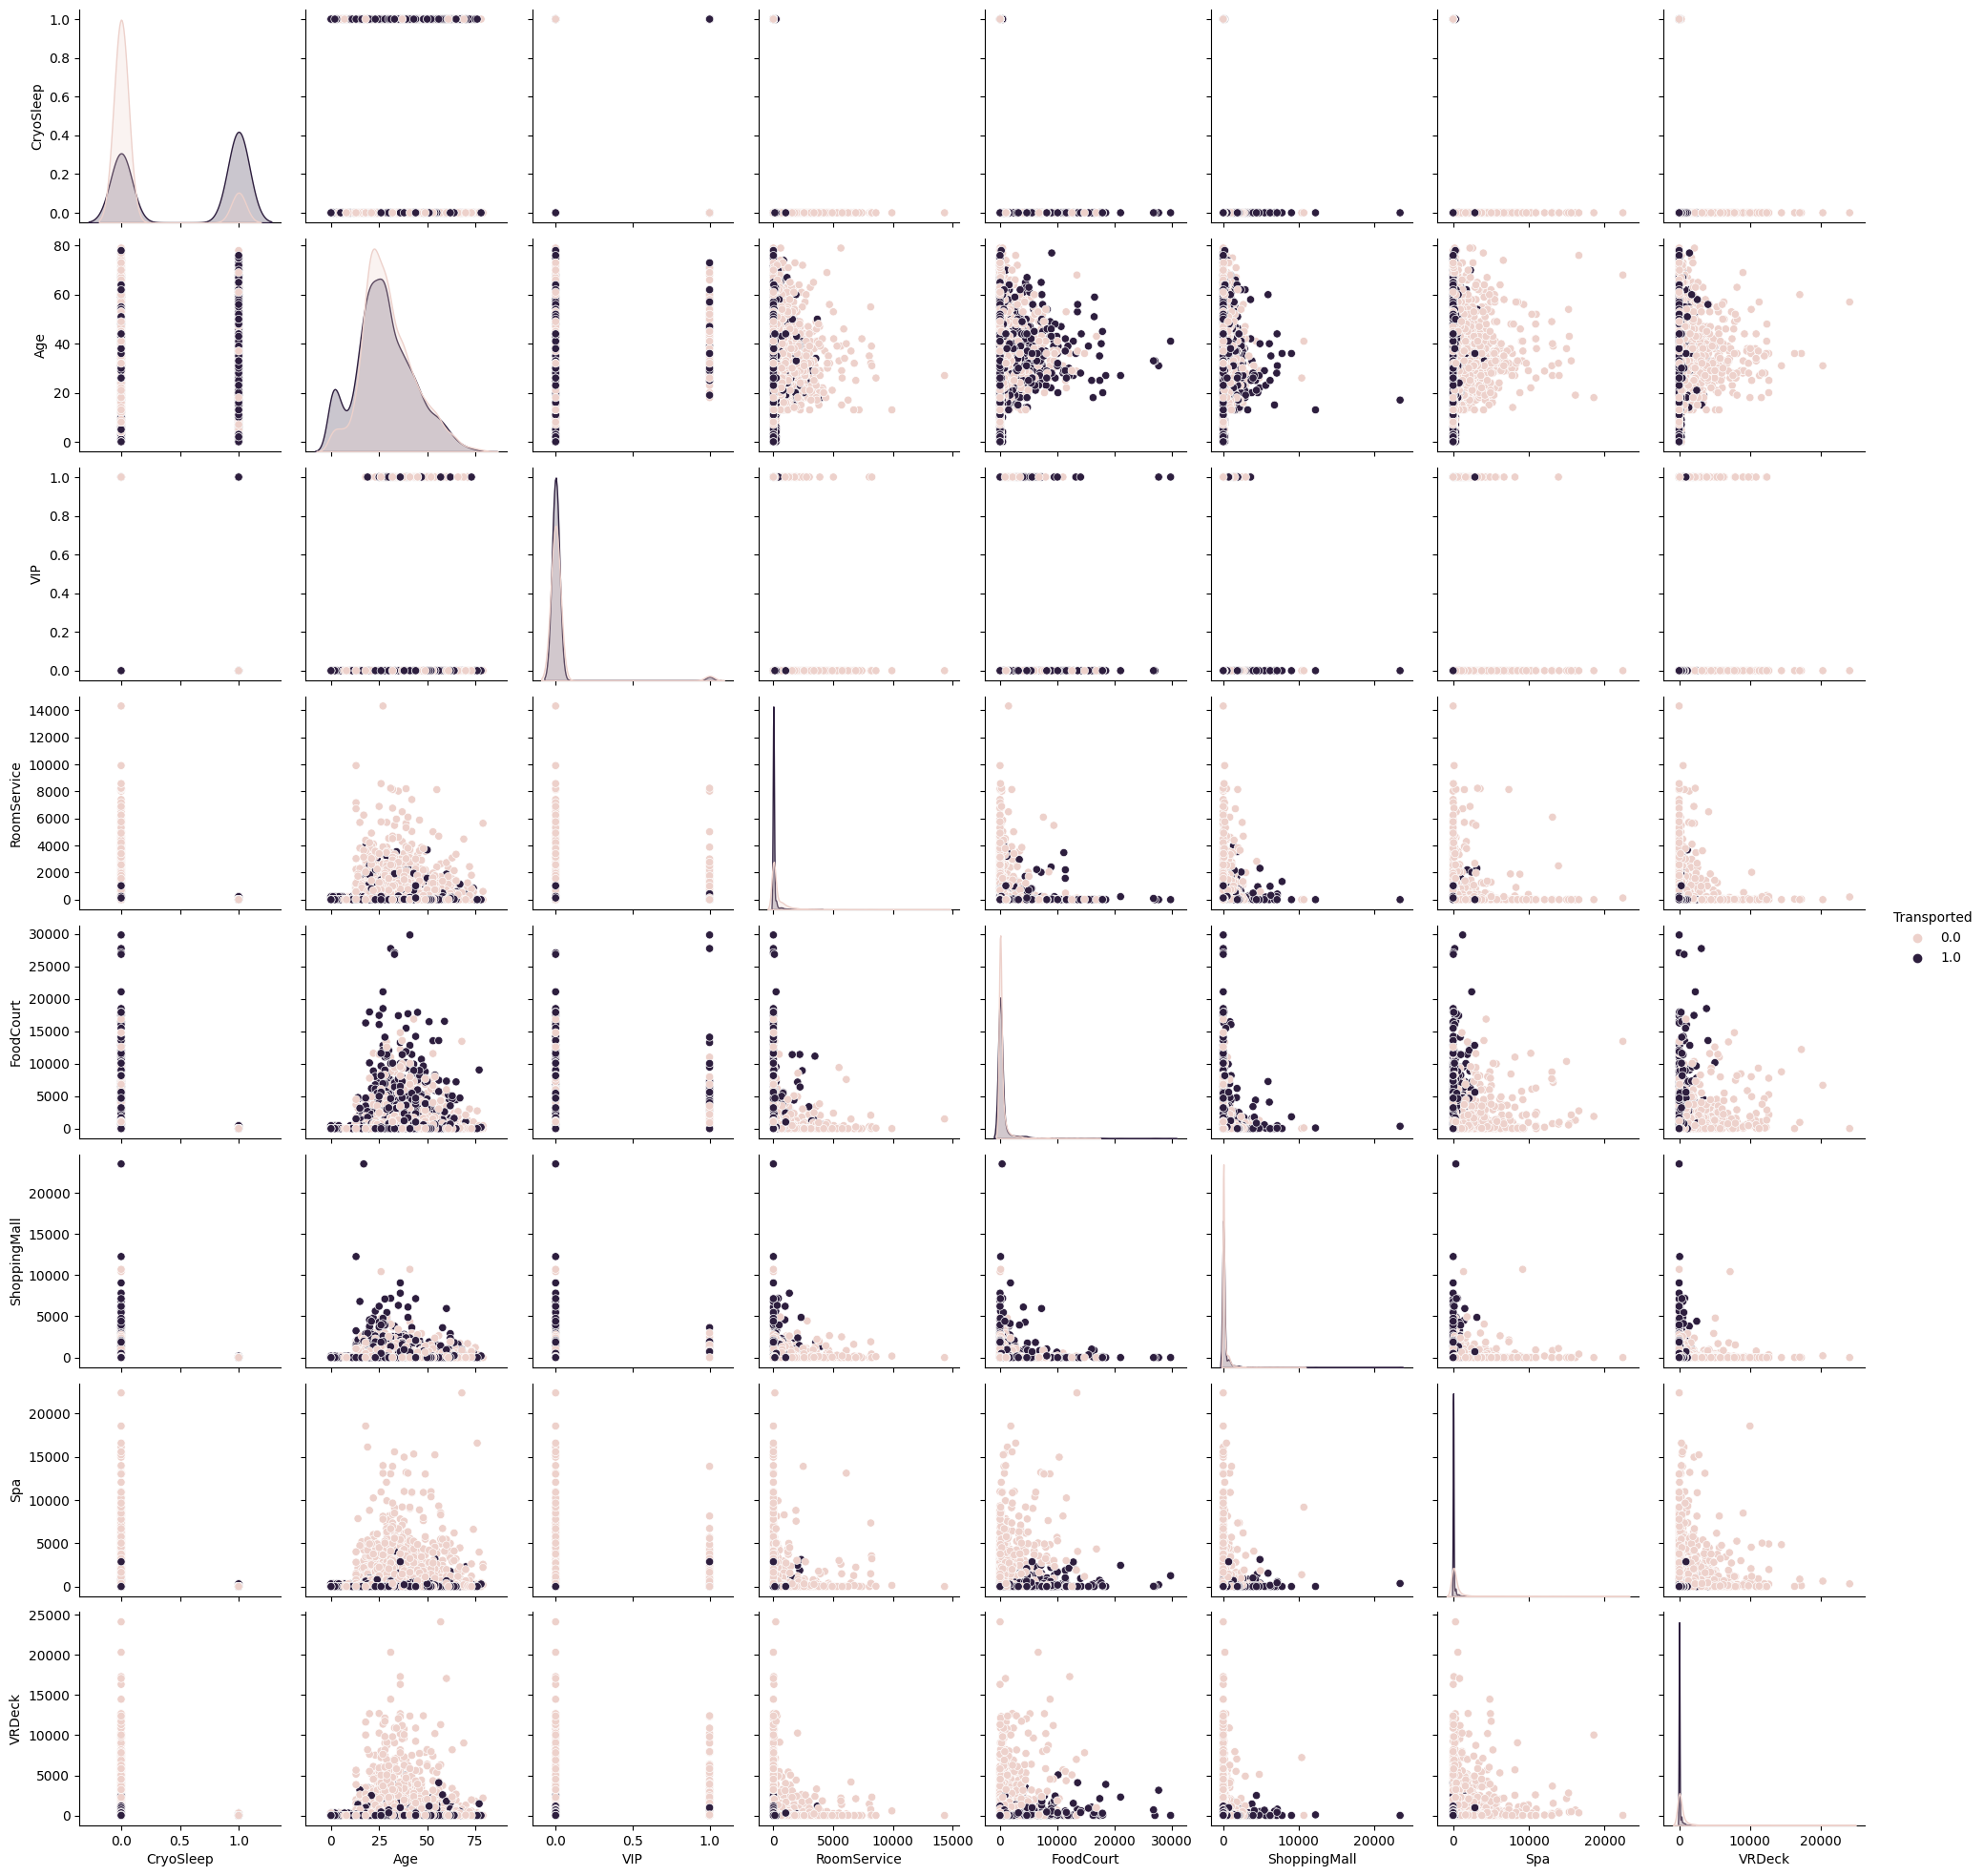

In [ ]:
sns.pairplot(data=new_df, hue='Transported')

데이터프레임 new_df의 변수들 중 'CryoSleep', 'Destination', 'VIP', 'HomePlanet' 열에 대한 막대 그래프를 시각화

CryoSleep, Destination, VIP, HomePlanet 변수들과 'Transported' 변수 간의 관계를 시각적으로 파악

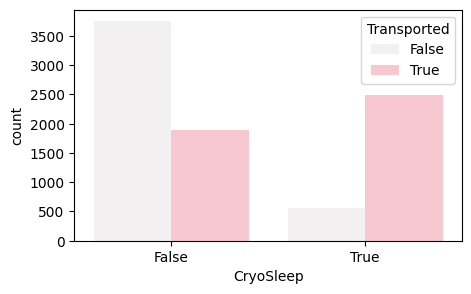

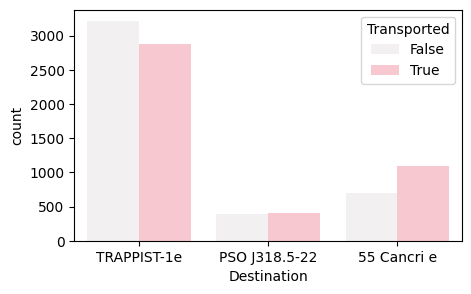

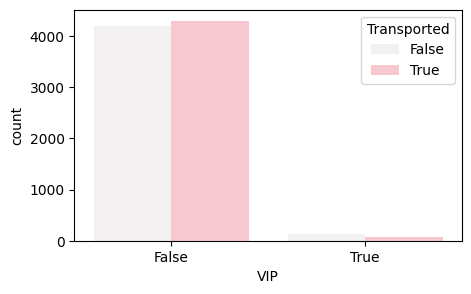

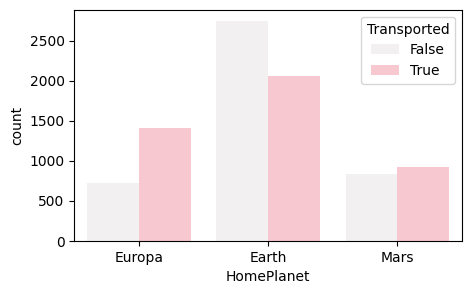

In [ ]:
columns = ['CryoSleep', 'Destination', 'VIP', 'HomePlanet']
for col in columns:
    fig, ax = plt.subplots(figsize=(5, 3))
    sns.countplot(data=new_df, x=col, hue='Transported', ax=ax, color='pink')

데이터프레임 new_df에서 Transported 열이 결측치인 경우와 결측치가 아닌 경우를 분리하여 새로운 데이터프레임인 df_test와 df_train에 저장

In [ ]:
df_test=new_df[new_df['Transported'].isnull()]
df_train=new_df[~new_df['Transported'].isnull()]

데이터프레임 df와 data에서 'Cabin' 열을 삭제

In [ ]:
df.drop('Cabin', axis=1, inplace=True)
data.drop('Cabin', axis=1, inplace=True)